# Exploration

Here we perform some basic exploration of the SECOP II dataset in order to get basic insights and get some ideas on how to process the data for training the model.

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

# Data Loading

In [3]:
raw_file = os.path.join("..", "data", "raw", "raw_data.csv")
df_raw = pd.read_csv(raw_file)

print(df_raw.shape)
print(df_raw.columns)

df_raw.head()

(500000, 2)
Index(['descripcion_del_proceso', 'codigo_de_categoria_principal'], dtype='object')


,descripcion_del_proceso,codigo_de_categoria_principal
0,Prestar los servicios profesionales de apoyo j...,V1.77101604
1,CONTRATAR EL SERVICIO DE GESTIÓN DE EVENTOS O ...,V1.90101604
2,Censo_Economico_2021_SECGEN_BDMGN_TH Prestació...,V1.80111500
3,PRESTAR SERVICIOS DE CARÁCTER TEMPORAL COMO IN...,V1.80111600
4,AUNAR ESFUERZOS ENTRE EL DEPARTAMENTO Y EL MUN...,V1.72141003


In [4]:
pd.isnull(df_raw).sum()

descripcion_del_proceso          0
codigo_de_categoria_principal    0
dtype: int64

As we can see, there are no entries without description or UNSPSC code.

#  Load UNSPSC Codes References

In [5]:
unspsc_file = os.path.join("..","references","UNSPSC Codes Reference.xlsx")
df_unspsc = pd.read_excel(unspsc_file)

print(df_unspsc.shape)
print(df_unspsc.columns)

df_unspsc.head()

(4295, 8)
Index(['Commodity Code', 'Commodity Title', 'Class Code', 'Class Title',
       'Family Code', 'Family Title', 'Segment Code', 'Segment Title'],
      dtype='object')


,Commodity Code,Commodity Title,Class Code,Class Title,Family Code,Family Title,Segment Code,Segment Title
0,10111302,Pet grooming products,10111300,Domestic pet treatments and accessories and eq...,10110000,Domestic pet products,10000000,Live Plant and Animal Material and Accessories...
1,10111306,Domestic pet training kits,10111300,Domestic pet treatments and accessories and eq...,10110000,Domestic pet products,10000000,Live Plant and Animal Material and Accessories...
2,10131601,Cages or its accessories,10131600,Animal containment,10130000,Animal containment and habitats,10000000,Live Plant and Animal Material and Accessories...
3,10131602,Kennels,10131600,Animal containment,10130000,Animal containment and habitats,10000000,Live Plant and Animal Material and Accessories...
4,10131605,Animal transport cage,10131600,Animal containment,10130000,Animal containment and habitats,10000000,Live Plant and Animal Material and Accessories...


In [6]:
commodity_dict = dict(
    zip(
        df_unspsc['Commodity Code'],df_unspsc['Commodity Title']
    )
)
class_dict = dict(
    zip(
        df_unspsc['Class Code'].astype('str').str.extract('([0-9]{6})', expand=False),
        df_unspsc['Class Title']
    )
)
family_dict = dict(
    zip(
        df_unspsc['Family Code'].astype('str').str.extract('([0-9]{4})', expand=False),
        df_unspsc['Family Title']
    )
)
segment_dict = dict(
    zip(
        df_unspsc['Segment Code'].astype('str').str.extract('([0-9]{2})', expand=False),
        df_unspsc['Segment Title']
    )
)

# Transform UNSPSC codes to topics

In [7]:
df_raw['codigo_de_categoria_principal'] = df_raw['codigo_de_categoria_principal'].str.extract('([0-9]{8})', expand=False)

df_raw['segment_code'] = df_raw['codigo_de_categoria_principal'].str.extract('([0-9]{2})', expand=False)
df_raw['family_code'] = df_raw['codigo_de_categoria_principal'].str.extract('([0-9]{2,4})', expand=False)
df_raw['class_code'] = df_raw['codigo_de_categoria_principal'].str.extract('([0-9]{4,6})', expand=False)
df_raw['commodity_code'] = df_raw['codigo_de_categoria_principal'].str.extract('([0-9]{6,8})', expand=False)

df_raw.head()

,descripcion_del_proceso,codigo_de_categoria_principal,segment_code,family_code,class_code,commodity_code
0,Prestar los servicios profesionales de apoyo j...,77101604,77,7710,771016,77101604
1,CONTRATAR EL SERVICIO DE GESTIÓN DE EVENTOS O ...,90101604,90,9010,901016,90101604
2,Censo_Economico_2021_SECGEN_BDMGN_TH Prestació...,80111500,80,8011,801115,80111500
3,PRESTAR SERVICIOS DE CARÁCTER TEMPORAL COMO IN...,80111600,80,8011,801116,80111600
4,AUNAR ESFUERZOS ENTRE EL DEPARTAMENTO Y EL MUN...,72141003,72,7214,721410,72141003


In [7]:
df_raw['segment_text'] = df_raw.segment_code.replace(segment_dict).str.extract('([^0-9]+)')
df_raw['family_text'] = df_raw.family_code.replace(family_dict).str.extract('([^0-9]+)')
df_raw['class_text'] = df_raw.class_code.replace(class_dict).str.extract('([^0-9]+)')
df_raw['commodity_text'] = df_raw.commodity_code.replace(commodity_dict).str.extract('([^0-9]+)')

df_raw.head(10)

,descripcion_del_proceso,codigo_de_categoria_principal,segment_code,family_code,class_code,commodity_code,segment_text,family_text,class_text,commodity_text
0,Prestar los servicios profesionales de apoyo j...,77101604,77,7710,771016,77101604,NaN,NaN,NaN,NaN
1,CONTRATAR EL SERVICIO DE GESTIÓN DE EVENTOS O ...,90101604,90,9010,901016,90101604,NaN,NaN,NaN,NaN
2,Censo_Economico_2021_SECGEN_BDMGN_TH Prestació...,80111500,80,8011,801115,80111500,NaN,NaN,NaN,NaN
3,PRESTAR SERVICIOS DE CARÁCTER TEMPORAL COMO IN...,80111600,80,8011,801116,80111600,NaN,NaN,NaN,NaN
4,AUNAR ESFUERZOS ENTRE EL DEPARTAMENTO Y EL MUN...,72141003,72,7214,721410,72141003,NaN,NaN,NaN,NaN
5,El objeto del presente contrato es la Administ...,93151500,93,9315,931515,93151500,Politics and Civic Affairs Services,Public administration and finance services,NaN,NaN
6,2021V-32 PRESTAR SERVICIOS PROFESIONALES PARA ...,80101600,80,8010,801016,80101600,NaN,NaN,NaN,NaN
7,SERVICIO DE FUMIGACIÓN POR ASPERSIÓN PARA EL A...,72154043,72,7215,721540,72154043,NaN,NaN,NaN,NaN
8,PRESTAR SERVICIOS COMO PROFESIONAL PARA EL COM...,80111701,80,8011,801117,80111701,NaN,NaN,NaN,NaN
9,CONTRATO DE OBRA PÚBLICA PARA LA ADQUISICIÓN D...,72151500,72,7215,721515,72151500,NaN,NaN,NaN,NaN


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   descripcion_del_proceso        500000 non-null  object
 1   codigo_de_categoria_principal  499386 non-null  object
 2   segment_code                   499386 non-null  object
 3   family_code                    499386 non-null  object
 4   class_code                     499386 non-null  object
 5   commodity_code                 499386 non-null  object
dtypes: object(6)
memory usage: 22.9+ MB


Here we can see that theres a lot of codes without a topic representation. So it's better keep making the analysis with the codes instead of his text representations

# Description Exploration

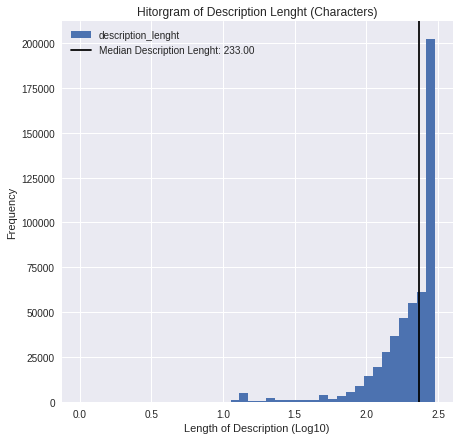

In [9]:
df_raw["description_lenght"] = df_raw.descripcion_del_proceso.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_raw["description_lenght"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Description Lenght: {10 ** median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Description Lenght (Characters)")
ax.set_xlabel("Length of Description (Log10)")
ax.legend()
plt.show()

From these basic histograms of description texts, we can see that mosk contracts texts are rather short, with a median description length of around 232 characters (10 ^ 2,36). This in turn corresponds to around 35 - 45 words.

# Text Exploration

Now we take a quick look at one of the contracts bodies to get a better idea of what we are dealing with.

In [10]:
np.random.seed(987)
sample_df = df_raw.sample(6).reset_index(drop=True)
sample_df

,descripcion_del_proceso,codigo_de_categoria_principal,segment_code,family_code,class_code,commodity_code,description_lenght
0,SUMINISTRO DE MEDICAMENTOS AMBULATORIOS PARA L...,51101500,51,5110,511015,51101500,182
1,Prestar con plena autonomía técnica y administ...,86141704,86,8614,861417,86141704,227
2,Prestación de Servicios Profesionales como Abo...,80111501,80,8011,801115,80111501,256
3,PRESTAR SERVICIOS PROFESIONALES DE CARÁCTER TE...,80111600,80,8011,801116,80111600,284
4,Prestar servicios personales de carácter tempo...,86101710,86,8610,861017,86101710,300
5,Entregar a título de comodato a la Policía Nac...,95101800,95,9510,951018,95101800,230


In [11]:
print(sample_df.loc[1, "descripcion_del_proceso"])

Prestar con plena autonomía técnica y administrativa sus servicios profesionales en sistemas de la información  bibliotecología y archivística en el área de Gestión Documental  para apoyar la misión de la Biblioteca de la FUGA.


In [12]:
print(sample_df.loc[2, "descripcion_del_proceso"])

Prestación de Servicios Profesionales como Abogado (a) en la Subsecretaría de Acceso a Servicíos de Justicia  en desarrollo del proyecto denominado:  Fortalecimiento de los servicios de acceso a la justicia en Santiago de Cali  Según ficha EBI No. 26002080


# Segments explorations

<AxesSubplot:title={'center':'20 most important UNSPSC Segment Codes'}, xlabel='percentage', ylabel='Segment Codes'>

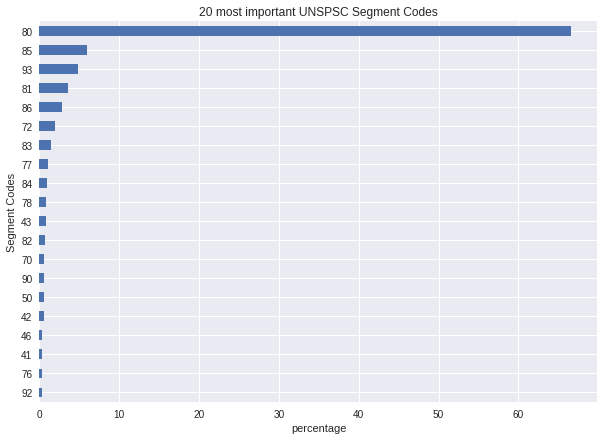

In [26]:
plt.figure(figsize=(10,7))
plt.title('20 most important UNSPSC Segment Codes')
plt.ylabel('Segment Codes')
plt.xlabel('percentage')
(100*df_raw.segment_code.value_counts(normalize=True)).iloc[:20].sort_values().plot(kind = 'barh')

This plot shows us that we have a unbalanced dataset, where the majority of the UNSPSC codes are in 80 Segment